# Feature Engineering in Balance Data

### 0. Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

- load all data 
    - to save memory, change data type 

In [2]:
def get_balance_data():
    pos_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int32, 'SK_DPD':np.int32,
        'SK_DPD_DEF':np.int32, 'CNT_INSTALMENT':np.float32,'CNT_INSTALMENT_FUTURE':np.float32
    }
    
    install_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'NUM_INSTALMENT_NUMBER':np.int32, 'NUM_INSTALMENT_VERSION':np.float32,
        'DAYS_INSTALMENT':np.float32, 'DAYS_ENTRY_PAYMENT':np.float32, 'AMT_INSTALMENT':np.float32, 'AMT_PAYMENT':np.float32
    }
    
    card_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int16,
        'AMT_CREDIT_LIMIT_ACTUAL':np.int32, 'CNT_DRAWINGS_CURRENT':np.int32, 'SK_DPD':np.int32,'SK_DPD_DEF':np.int32,
        'AMT_BALANCE':np.float32, 'AMT_DRAWINGS_ATM_CURRENT':np.float32, 'AMT_DRAWINGS_CURRENT':np.float32,
        'AMT_DRAWINGS_OTHER_CURRENT':np.float32, 'AMT_DRAWINGS_POS_CURRENT':np.float32, 'AMT_INST_MIN_REGULARITY':np.float32,
        'AMT_PAYMENT_CURRENT':np.float32, 'AMT_PAYMENT_TOTAL_CURRENT':np.float32, 'AMT_RECEIVABLE_PRINCIPAL':np.float32,
        'AMT_RECIVABLE':np.float32, 'AMT_TOTAL_RECEIVABLE':np.float32, 'CNT_DRAWINGS_ATM_CURRENT':np.float32,
        'CNT_DRAWINGS_OTHER_CURRENT':np.float32, 'CNT_DRAWINGS_POS_CURRENT':np.float32, 'CNT_INSTALMENT_MATURE_CUM':np.float32
    }
        
    pos_bal = pd.read_csv('data/POS_CASH_balance.csv', dtype=pos_dtype)
    install = pd.read_csv('data/installments_payments.csv', dtype=install_dtype)
    card_bal = pd.read_csv('data/credit_card_balance.csv', dtype=card_dtype)
    
    return pos_bal, install, card_bal

In [3]:
pos_bal, install, card_bal = get_balance_data()

- load pickle data, apps03

In [4]:
import pickle 
with open('apps03.pkl', 'rb') as f:
    apps = pickle.load(f)

apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,APPS_INCOME_BIRTH_RATIO,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_ENDDATE_FACT_MIN,BUREAU_DAYS_ENDDATE_FACT_MAX,BUREAU_DAYS_ENDDATE_FACT_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MIN,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MAX,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MIN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MAX,BUREAU_BUREAU_CREDIT_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MIN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO

### 1. pos_bal

In [5]:
pos_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             uint32 
 1   SK_ID_CURR             uint32 
 2   MONTHS_BALANCE         int32  
 3   CNT_INSTALMENT         float32
 4   CNT_INSTALMENT_FUTURE  float32
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int32  
 7   SK_DPD_DEF             int32  
dtypes: float32(2), int32(3), object(1), uint32(2)
memory usage: 343.4+ MB


In [14]:
print(pos_bal.shape)
print(pos_bal.isnull().sum())
pos_bal.head()

(10001358, 8)
SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


#### Compare histogram for numeric features in pos_bal by TARGET

In [5]:
pos_bal_app = pos_bal.merge(apps[['SK_ID_CURR','TARGET']], on='SK_ID_CURR', how='left')

num_cols = pos_bal_app.dtypes[pos_bal_app.dtypes != 'object'].index.tolist()

In [6]:
num_cols = [col for col in num_cols if col not in ['SK_ID_CURR','SK_ID_PREV','TARGET']]

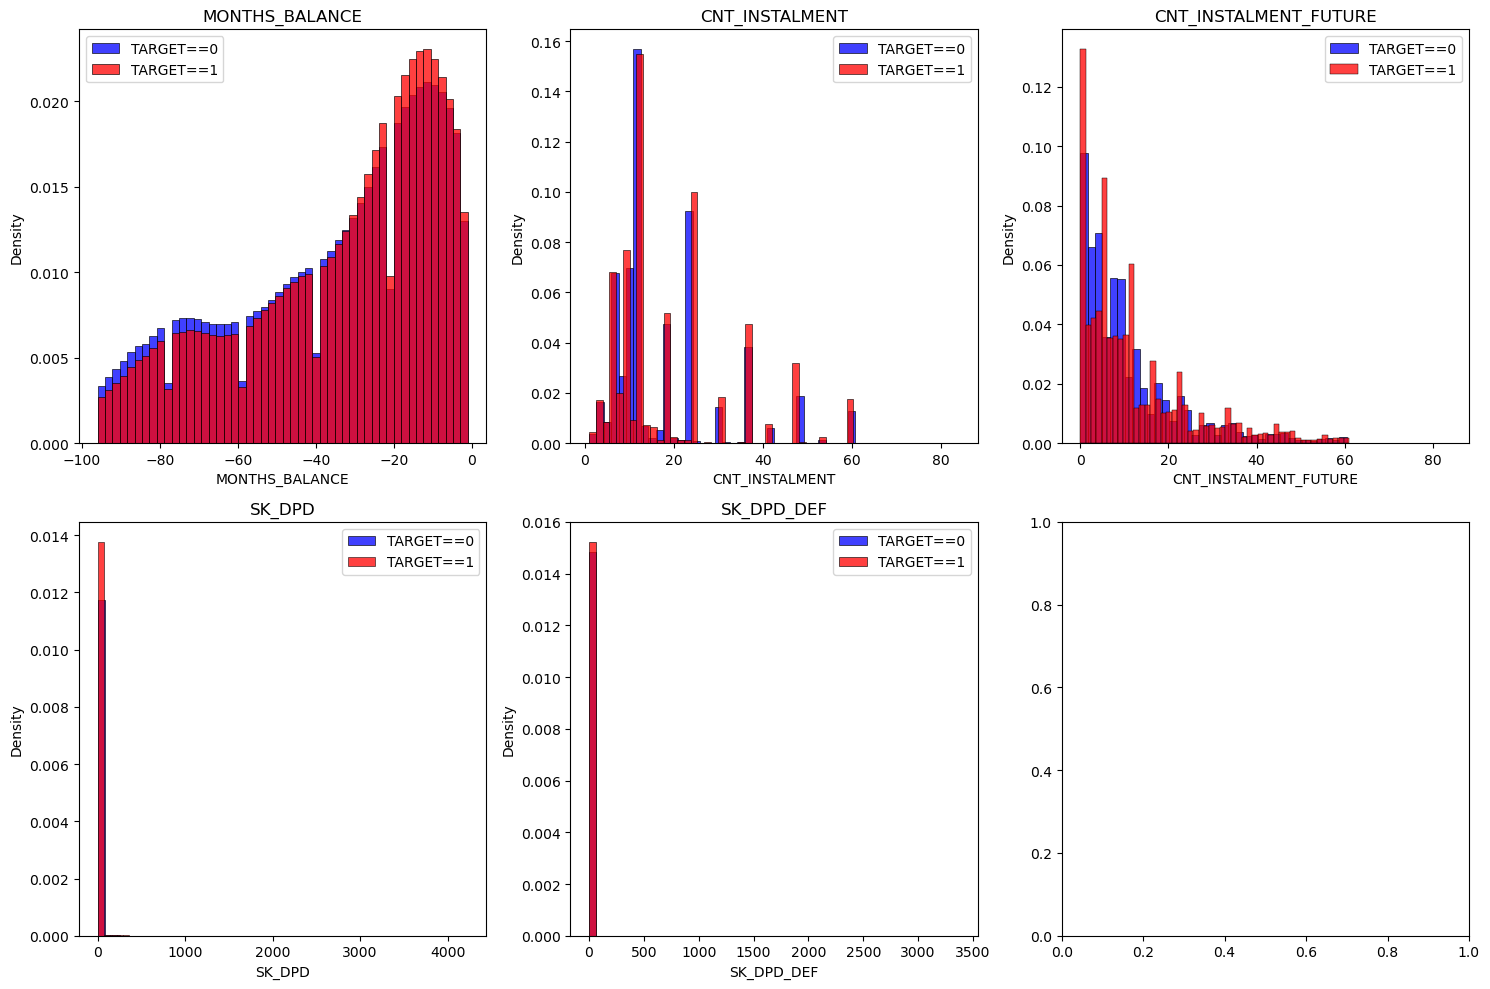

In [9]:
def show_hist_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    for i, feature in enumerate(features):
        row = i//3
        col = i%3
        
        sns.histplot(df[cond0 & np.isfinite(df[feature])][feature], stat='density', color='blue', ax=ax[row,col], bins=50)
        sns.histplot(df[cond1 & np.isfinite(df[feature])][feature], stat='density', color='red', ax=ax[row,col], bins=50)
        ax[row,col].set_title(feature)
        ax[row,col].legend(['TARGET==0', 'TARGET==1'])
    
    plt.tight_layout()
    plt.show()

show_hist_by_target(pos_bal_app, num_cols)
    

#### SK_DPD

In [10]:
pos_bal['SK_DPD'].value_counts()

SK_DPD
0       9706131
1         21872
2         17358
3         14403
4         12350
         ...   
3161          1
3217          1
3323          1
3399          1
3082          1
Name: count, Length: 3400, dtype: int64

In [7]:
print(pos_bal[pos_bal['SK_DPD']>0].shape)
print(pos_bal[(pos_bal['SK_DPD']> 0) & (pos_bal['SK_DPD']<30)].shape)
print(pos_bal[(pos_bal['SK_DPD']>= 30) & (pos_bal['SK_DPD']<120)].shape)
print(pos_bal[pos_bal['SK_DPD']>=120].shape)
# It would be better to use 'more than 0', 'between 0 and 120', 'more than 120' as a feature

(295227, 8)
(162598, 8)
(17856, 8)
(114773, 8)


In [8]:
pos_bal['IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
pos_bal['IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if (x>0)&(x<120) else 0)
pos_bal['IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x>=120 else 0)

In [9]:
pos_bal[pos_bal['SK_DPD']>120].head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,IS_DPD,IS_DPD_UNDER_120,IS_DPD_OVER_120
2252,2562793,287880,-46,7.0,0.0,Active,1105,0,1,0,1
3507,1290101,322484,-37,6.0,0.0,Active,329,0,1,0,1
3996,2002705,413918,-48,6.0,0.0,Active,146,0,1,0,1
4438,1184431,369596,-44,6.0,0.0,Active,173,0,1,0,1
5234,1526249,275666,-39,12.0,0.0,Active,798,0,1,0,1
5290,2273596,343663,-45,6.0,0.0,Active,143,0,1,0,1
5787,1473810,167948,-40,12.0,0.0,Active,566,0,1,0,1
5788,2749600,365698,-35,12.0,0.0,Active,566,0,1,0,1
5904,1463725,265782,-36,6.0,0.0,Active,324,0,1,0,1
5918,2797839,172911,-39,6.0,0.0,Active,182,0,1,0,1


#### agg

In [10]:
agg_dict = {
    'SK_ID_CURR':['count'], 
    'MONTHS_BALANCE':['min', 'mean', 'max'], 
    'SK_DPD':['min', 'max', 'mean'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_UNDER_120':['mean', 'sum'],
    'IS_DPD_OVER_120':['mean', 'sum']
}

pos_bal_agg = pos_bal.groupby('SK_ID_CURR').agg(agg_dict)
pos_bal_agg.columns = ['POS_'+('_').join(col).upper() for col in pos_bal_agg.columns.ravel()]
pos_bal_agg = pos_bal_agg.reset_index()

pos_bal_agg.head()

,SK_ID_CURR,POS_SK_ID_CURR_COUNT,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_MAX,POS_SK_DPD_MIN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_IS_DPD_MEAN,POS_IS_DPD_SUM,POS_IS_DPD_UNDER_120_MEAN,POS_IS_DPD_UNDER_120_SUM,POS_IS_DPD_OVER_120_MEAN,POS_IS_DPD_OVER_120_SUM
0,100001,9,-96,-72.555556,-53,0,7,0.777778,0.111111,1,0.111111,1,0.0,0
1,100002,19,-19,-10.000000,-1,0,0,0.000000,0.000000,0,0.000000,0,0.0,0
2,100003,28,-77,-43.785714,-18,0,0,0.000000,0.000000,0,0.000000,0,0.0,0
3,100004,4,-27,-25.500000,-24,0,0,0.000000,0.000000,0,0.000000,0,0.0,0
4,100005,11,-25,-20.000000,-15,0,0,0.000000,0.000000,0,0.000000,0,0.0,0


#### merge with apps

In [11]:
apps = apps.merge(pos_bal_agg, on='SK_ID_CURR', how='left')
apps.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_ENDDATE_FACT_MIN,BUREAU_DAYS_ENDDATE_FACT_MAX,BUREAU_DAYS_ENDDATE_FACT_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MIN,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MAX,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MIN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MAX,BUREAU_BUREAU_CREDIT_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MIN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MIN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MAX,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MEAN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MIN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MAX,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MEAN,BUREAU_IS_DPD_MEAN,BUREAU_IS_DPD_SUM,BUREAU_IS_DPD_OVER_120_MEAN,BUREAU_IS_DPD_OVER_120_SUM,BUREAU_DPD_RATIO,BUREAU_

### 2. install

In [12]:
print(install.shape)
print(install.isnull().sum())
print(install.info())

install.head()

(13605401, 8)
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              uint32 
 1   SK_ID_CURR              uint32 
 2   NUM_INSTALMENT_VERSION  float32
 3   NUM_INSTALMENT_NUMBER   int32  
 4   DAYS_INSTALMENT         float32
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float32
 7   AMT_PAYMENT             float32
dtypes: float32(5), int32(1), uint32(2)
memory usage: 415.2 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


#### Compare Histogram for numeric features in Installment by TARGET

In [13]:
intall_app = install.merge(apps[['SK_ID_CURR','TARGET']], on='SK_ID_CURR', how='left')

num_cols = intall_app.dtypes[intall_app.dtypes != 'object'].index.tolist()

In [33]:
len(num_cols)
# 3 X 3 Figure

9

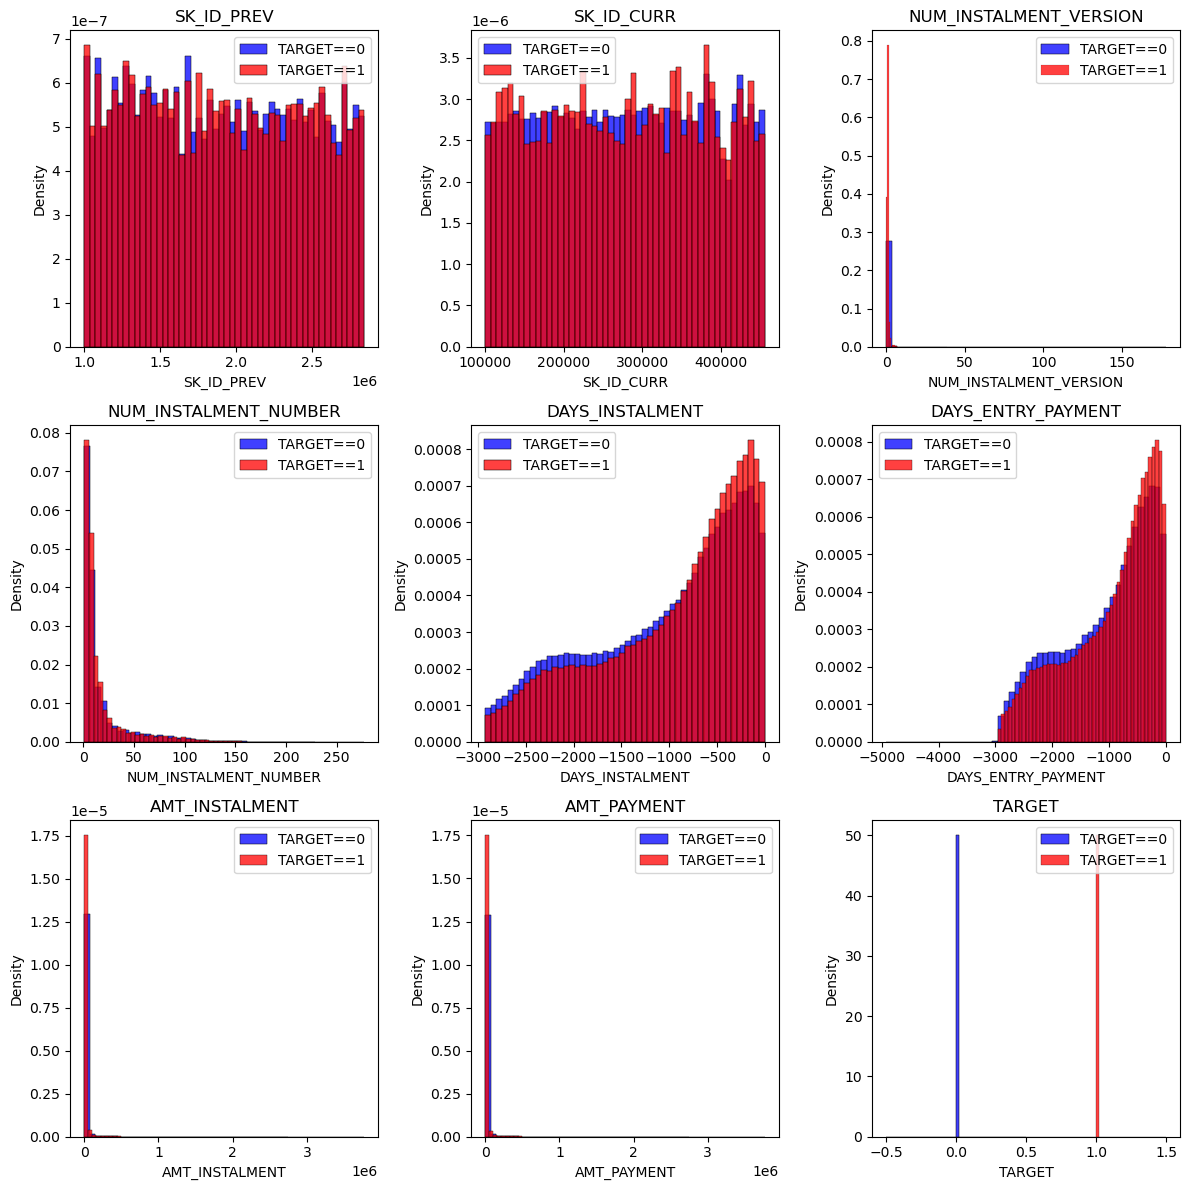

In [34]:

def show_hist_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
    for i, feature in enumerate(features):
        row = i//3
        col = i%3 

        sns.histplot(df[cond0 & np.isfinite(df[feature])][feature], stat='density', color='blue', ax=ax[row,col], bins=50)
        sns.histplot(df[cond1 & np.isfinite(df[feature])][feature], stat='density', color='red', ax=ax[row,col], bins=50)
        ax[row,col].set_title(feature)
        ax[row,col].legend(['TARGET==0', 'TARGET==1'])
    
    plt.tight_layout()
    plt.show()

show_hist_by_target(intall_app, num_cols)

#### AMT_INSTALLMENT & AMT_PAYMENT

In [14]:
install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
install['AMT_RATIO'] =  (install['AMT_PAYMENT'] +1)/ (install['AMT_INSTALMENT'] + 1) # to prevent 0 division
install['DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']

install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,DPD
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0


In [15]:
print(install[install['DPD'] > 0].shape)
print(install[(install['DPD'] < 120) & (install['DPD'] > 0)].shape)
print(install[install['DPD'] >= 120].shape)

install['IS_DPD'] = install['DPD'].apply(lambda x: 1 if x>0 else 0)
install['IS_DPD_UNDER_120'] = install['DPD'].apply(lambda x: 1 if (x>0)&(x<120) else 0)
install['IS_DPD_OVER_120'] = install['DPD'].apply(lambda x: 1 if x>=120 else 0)

install.head()

(1146669, 11)
(1135820, 11)
(10849, 11)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_DIFF,AMT_RATIO,DPD,IS_DPD,IS_DPD_UNDER_120,IS_DPD_OVER_120
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863,0.000000,1.000000,-7.0,0,0,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024,0.000000,1.000000,0.0,0,0,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000,0.000000,1.000000,0.0,0,0,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859,0.000000,1.000000,-8.0,0,0,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961,4.455078,0.997943,17.0,1,1,0


#### take only the recent installment data ('DATA_ENTRY_PAYMENT' >= -365)

In [16]:
install = install[install['DAYS_ENTRY_PAYMENT'] >= -365]
install.shape

(3357951, 14)

In [17]:
agg_dict = {
    'SK_ID_CURR':['count'],
    'NUM_INSTALMENT_VERSION':['nunique'], 
    'DAYS_ENTRY_PAYMENT':['mean', 'max', 'sum'],
    'DAYS_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_INSTALMENT':['mean', 'max', 'sum'],
    'AMT_PAYMENT':['mean', 'max','sum'],
    'AMT_DIFF':['mean','min', 'max','sum'],
    'AMT_RATIO':['mean', 'max'],
    'DPD':['mean', 'min', 'max'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_UNDER_120':['mean', 'sum'],
    'IS_DPD_OVER_120':['mean', 'sum']    
}

install_agg = install.groupby('SK_ID_CURR').agg(agg_dict)
install_agg.columns = ['INST_'+('_').join(col).upper() for col in install_agg.columns.ravel()]
install_agg = install_agg.reset_index()

In [18]:
print(install_agg.shape)
install_agg.head()

(250823, 30)


,SK_ID_CURR,INST_SK_ID_CURR_COUNT,INST_NUM_INSTALMENT_VERSION_NUNIQUE,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MAX,INST_DAYS_ENTRY_PAYMENT_SUM,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_INSTALMENT_MAX,INST_DAYS_INSTALMENT_SUM,INST_AMT_INSTALMENT_MEAN,INST_AMT_INSTALMENT_MAX,INST_AMT_INSTALMENT_SUM,INST_AMT_PAYMENT_MEAN,INST_AMT_PAYMENT_MAX,INST_AMT_PAYMENT_SUM,INST_AMT_DIFF_MEAN,INST_AMT_DIFF_MIN,INST_AMT_DIFF_MAX,INST_AMT_DIFF_SUM,INST_AMT_RATIO_MEAN,INST_AMT_RATIO_MAX,INST_DPD_MEAN,INST_DPD_MIN,INST_DPD_MAX,INST_IS_DPD_MEAN,INST_IS_DPD_SUM,INST_IS_DPD_UNDER_120_MEAN,INST_IS_DPD_UNDER_120_SUM,INST_IS_DPD_OVER_120_MEAN,INST_IS_DPD_OVER_120_SUM
0,100002,11,2,-192.363632,-49.0,-2116.0,-175.000000,-25.0,-1925.0,13237.409180,53093.746094,145611.500000,13237.409180,53093.746094,145611.500000,0.0,0.0,0.0,0.0,1.0,1.0,-17.363636,-24.0,-12.0,0.0,0,0.0,0,0.0,0
1,100006,11,2,-152.636368,-12.0,-1679.0,-146.454544,-11.0,-1611.0,89278.367188,691786.875000,982062.062500,89278.367188,691786.875000,982062.062500,0.0,0.0,0.0,0.0,1.0,1.0,-6.181818,-23.0,-1.0,0.0,0,0.0,0,0.0,0
2,100007,12,1,-181.250000,-14.0,-2175.0,-179.000000,-14.0,-2148.0,16037.639648,16037.639648,192451.671875,16037.639648,16037.639648,192451.671875,0.0,0.0,0.0,0.0,1.0,1.0,-2.250000,-4.0,0.0,0.0,0,0.0,0,0.0,0
3,100008,10,1,-215.000000,-82.0,-2150.0,-204.000000,-69.0,-2040.0,17884.863281,17885.835938,178848.640625,17884.863281,17885.835938,178848.640625,0.0,0.0,0.0,0.0,1.0,1.0,-11.000000,-21.0,-1.0,0.0,0,0.0,0,0.0,0
4,100009,22,1,-206.136368,-58.0,-4535.0,-196.409088,-43.0,-4321.0,8605.171875,10418.669922,189313.781250,8605.171875,10418.669922,189313.781250,0.0,0.0,0.0,0.0,1.0,1.0,-9.727273,-16.0,-2.0,0.0,0,0.0,0,0.0,0


#### merge with apps

In [19]:
apps = apps.merge(install_agg, on='SK_ID_CURR', how='left')
apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_ENDDATE_FACT_MIN,BUREAU_DAYS_ENDDATE_FACT_MAX,BUREAU_DAYS_ENDDATE_FACT_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MIN,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MAX,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MIN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MAX,BUREAU_BUREAU_CREDIT_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MIN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MIN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MAX,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MEAN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MIN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MAX,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MEAN,BUREAU_IS_DPD_MEAN,BUREAU_IS_DPD_SUM,BUREAU_IS_DPD_OVER_120_MEAN,BUREAU_IS_DPD_OVER_120_SUM,BUREAU_DPD_RATIO,BUREAU_DPD_OVER_120_RATIO,BUREAU_BAL_SK_ID_CURR_COUNT,BUREAU_BAL_MONTHS_BALANCE_MIN,BUREAU_BAL_MONTHS_BALANCE_MAX,BUREAU_BAL_MONTHS_BALANCE_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_SUM,BUREAU_BAL_IS_DPD_RATIO,BUREAU_BAL_IS_DPD_OVER_120_RATIO,POS_SK_ID_CURR_COUNT,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_MAX,POS_SK_DPD_MIN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_IS_DPD_MEAN,POS_IS_DPD_SUM,POS_IS_DPD_UNDER_120_MEAN,POS_IS_DPD_UNDER_120_SUM,POS_IS_DPD_OVER_120_MEAN,POS_IS_DPD_OVER_120_SUM,INST_SK_ID_CURR_COUNT,INST_NUM_INSTALMENT_VERSION_NUNIQUE,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MAX,INST_DAYS_ENTRY_PAYMENT_SUM,INST_DAYS_INSTALME

### 3. credit_card

In [20]:
print(card_bal.shape)
print(card_bal.isnull().sum())
print(card_bal.info())

card_bal.head()

(3840312, 23)
SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Colu

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,1800.0,1800.0,0.000000,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,2250.0,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,2250.0,2250.0,26926.425781,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,11925.0,11925.0,224949.281250,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,27000.0,27000.0,443044.406250,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


#### AMT_CREDIT_LIMIT_ACTUAL

In [21]:
card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE']/card_bal['AMT_CREDIT_LIMIT_ACTUAL']
card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']

In [22]:
card_bal[card_bal['SK_DPD']>0].shape
card_bal[card_bal['SK_DPD']<120].shape
card_bal[card_bal['SK_DPD']>=120].shape

card_bal['IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
card_bal['IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if (x>0)&(x<120) else 0)
card_bal['IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if x>=120 else 0)

In [23]:
card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,BALANCE_LIMIT_RATIO,DRAWING_LIMIT_RATIO,IS_DPD,IS_DPD_UNDER_120,IS_DPD_OVER_120
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,1800.0,1800.0,0.000000,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0,0.000422,0.00650,0,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,2250.0,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0,1.421679,0.05000,0,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,2250.0,2250.0,26926.425781,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0,0.070700,0.00000,0,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,11925.0,11925.0,224949.281250,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0,1.051432,0.01000,0,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,27000.0,27000.0,443044.406250,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0,1.008710,0.02566,0,0,0


#### take only the recent installment data ('MONTHS_BALANCE' >= -3)

In [24]:
card_bal = card_bal[card_bal['MONTHS_BALANCE'] >= -3]
card_bal.shape


(257354, 28)

#### agg

In [25]:
agg_dict = {
    'SK_ID_CURR':['count'],
    'AMT_BALANCE':['max'],
    'AMT_CREDIT_LIMIT_ACTUAL':['max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
    'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
    'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
    'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
    'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
    'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
    'CNT_DRAWINGS_POS_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max', 'sum'],
    'BALANCE_LIMIT_RATIO':['min','max'],
    'DRAWING_LIMIT_RATIO':['min', 'max'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_UNDER_120':['mean', 'sum'],
    'IS_DPD_OVER_120':['mean', 'sum']    
}

card_bal_agg = card_bal.groupby('SK_ID_CURR').agg(agg_dict)
card_bal_agg.columns = ['CARD_'+('_').join(col).upper() for col in card_bal_agg.columns.ravel()]
card_bal_agg = card_bal_agg.reset_index()
card_bal_agg.head()

,SK_ID_CURR,CARD_SK_ID_CURR_COUNT,CARD_AMT_BALANCE_MAX,CARD_AMT_CREDIT_LIMIT_ACTUAL_MAX,CARD_AMT_DRAWINGS_ATM_CURRENT_MAX,CARD_AMT_DRAWINGS_ATM_CURRENT_SUM,CARD_AMT_DRAWINGS_CURRENT_MAX,CARD_AMT_DRAWINGS_CURRENT_SUM,CARD_AMT_DRAWINGS_POS_CURRENT_MAX,CARD_AMT_DRAWINGS_POS_CURRENT_SUM,CARD_AMT_INST_MIN_REGULARITY_MAX,CARD_AMT_INST_MIN_REGULARITY_MEAN,CARD_AMT_PAYMENT_TOTAL_CURRENT_MAX,CARD_AMT_PAYMENT_TOTAL_CURRENT_SUM,CARD_AMT_TOTAL_RECEIVABLE_MAX,CARD_AMT_TOTAL_RECEIVABLE_MEAN,CARD_CNT_DRAWINGS_ATM_CURRENT_MAX,CARD_CNT_DRAWINGS_ATM_CURRENT_SUM,CARD_CNT_DRAWINGS_CURRENT_MAX,CARD_CNT_DRAWINGS_CURRENT_MEAN,CARD_CNT_DRAWINGS_CURRENT_SUM,CARD_CNT_DRAWINGS_POS_CURRENT_MEAN,CARD_SK_DPD_MEAN,CARD_SK_DPD_MAX,CARD_SK_DPD_SUM,CARD_BALANCE_LIMIT_RATIO_MIN,CARD_BALANCE_LIMIT_RATIO_MAX,CARD_DRAWING_LIMIT_RATIO_MIN,CARD_DRAWING_LIMIT_RATIO_MAX,CARD_IS_DPD_MEAN,CARD_IS_DPD_SUM,CARD_IS_DPD_UNDER_120_MEAN,CARD_IS_DPD_UNDER_120_SUM,CARD_IS_DPD_OVER_120_MEAN,CARD_IS_DPD_OVER_120_SUM
0,100006,3,0.000000,270000,NaN,0.0,0.000000,0.000000,NaN,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,0,0.000000,0,NaN,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0
1,100011,2,0.000000,90000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0,0.000000,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0
2,100013,3,0.000000,45000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0,0.000000,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0
3,100021,2,0.000000,675000,NaN,0.0,0.000000,0.000000,NaN,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.0,0,0.000000,0,NaN,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0
4,100028,3,37335.914062,225000,0.0,0.0,22823.550781,57700.664062,22823.550781,57700.664062,11250.0,7500.0,11250.0,22500.0,36980.414062,27067.109375,0.0,0.0,9,7.333333,22,7.333333,0.0,0,0,0.089875,0.165937,0.066709,0.101438,0.0,0,0.0,0,0.0,0


#### merge with apps

In [26]:
apps = apps.merge(card_bal_agg, on='SK_ID_CURR', how='left')
apps.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MIN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MAX,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MEAN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MIN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MAX,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MEAN,BUREAU_IS_DPD_MEAN,BUREAU_IS_DPD_SUM,BUREAU_IS_DPD_OVER_120_MEAN,BUREAU_IS_DPD_OVER_120_SUM,BUREAU_DPD_RATIO,BUREAU_DPD_OVER_120_RATIO,BUREAU_BAL_SK_ID_CURR_COUNT,BUREAU_BAL_MONTHS_BALANCE_MIN,BUREAU_BAL_MONTHS_BALANCE_MAX,BUREAU_BAL_MONTHS_BALANCE_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_SUM,BUREAU_BAL_IS_DPD_RATIO,BUREAU_BAL_IS_DPD_OVER_120_RATIO,POS_SK_ID_CURR_COUNT,POS_MONTHS_BALANCE_MIN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_MAX,POS_SK_DPD_MIN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_IS_DPD_MEAN,POS_IS_DPD_SUM,POS_IS_DPD_UNDER_120_MEAN,POS_IS_DPD_UNDER_120_SUM,POS_IS_DPD_OVER_120_MEAN,POS_IS_DPD_OVER_120_SUM,INST_SK_ID_CURR_COUNT,INST_NUM_INSTALMENT_VERSION_NUNIQUE,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MAX,INST_DAYS_ENTRY_PAYMENT_SUM,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_INSTALMENT_MAX,INST_DAYS_INSTALMENT_SUM,INST_AMT_INSTALMENT_MEAN,INST_AMT_INSTALMENT_MAX,INST_AMT_INSTALMENT_SUM,INST_AMT_PAYMENT_MEAN,INST_AMT_PAYMENT_MAX,INST_AMT_PAYMENT_SUM,INST_AMT_DIFF_MEAN,INST_AMT_DIFF_MIN,INST_AMT_DIFF_MAX,INST_AMT_DIFF_SUM,INST_AMT_RATIO_MEAN,INST_AMT_RATIO_MAX,INST_DPD_MEAN,INST_DPD_MIN,INST_DPD_MAX,INST_IS_DPD_MEAN,INST_IS_DPD_SUM,INST_IS_DPD_UNDER_120_MEAN,INST_IS_DPD_UNDER_120_SUM,INST_IS_DPD_OVER_120_MEAN,INST_IS_DPD_OVER_120_SUM,CARD_SK_ID_CURR_COUNT,CARD_AMT_BALANCE_MAX,CARD_AMT_CREDIT_LIMIT_ACTUAL_MAX,CARD_AMT_DRAWINGS_ATM_CURRENT_MAX,CARD_AMT_DRAWINGS_ATM_CURRENT_SUM,CARD_AMT_DRAWINGS_CURRENT_MAX,CARD_AMT_DRAWINGS_CURRENT_SUM,CARD_AMT_DRAWINGS_POS_CURRENT_MAX,CARD_AMT_DRAWINGS_POS_CURRENT_SUM,CARD_AMT_INST_MIN_REGULARITY_MAX,CARD_AMT_INST_MIN_REGULARITY_MEAN,CARD_AMT_PAYMENT_TOTAL_CURRENT_MAX,CARD_AMT_PAYMENT_TOTAL_CURRENT_SUM,CARD_AMT_TOTAL_RECEIVABLE_MAX,CARD_AMT_TOTAL_RECEIVABLE_MEAN,CARD_CNT_DRAWINGS_ATM_CURRENT_MAX,CARD_CNT_DRAWINGS_ATM_CURRENT_SUM,CARD_CNT_DRAWIN

### 4. Save file as .pickle

In [27]:
import pickle 

with open('apps04.pkl','wb') as f:
    pickle.dump(apps, f)